In [407]:
import pandas as pd
import missingno as mno
import xgboost as xgb
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics,svm
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn import tree,preprocessing 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import *
from sklearn.preprocessing import *
import warnings
warnings.filterwarnings('ignore')

In [408]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train2 = pd.read_excel("train.xlsx")


In [409]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [410]:
df_train = df_train.drop("Loan_ID",axis=1)

In [411]:
df_train = df_train.drop("Gender",axis=1)

df_demise =df_train.drop("Loan_Status", axis=1)
y = df_train['Loan_Status']

In [412]:
df_demise = pd.get_dummies(df_demise)

In [413]:
df_demise

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,0,1,0,1,0,1,0,0,0,1


In [414]:
df_demise["Loan_Status"] = df_train['Loan_Status']

In [415]:
df_demise["Income"] = (df_demise["ApplicantIncome"] + df_demise["CoapplicantIncome"])

In [416]:
df_demise=df_demise.drop(["ApplicantIncome","CoapplicantIncome"], axis=1)

In [417]:
df_demise

,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Income
0,NaN,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1,Y,5849.0
1,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,N,6091.0
2,66.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0,0,1,Y,3000.0
3,120.0,360.0,1.0,0,1,1,0,0,0,0,1,1,0,0,0,1,Y,4941.0
4,141.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,1,0,0,Y,2900.0
610,40.0,180.0,1.0,0,1,0,0,0,1,1,0,1,0,1,0,0,Y,4106.0
611,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,1,Y,8312.0
612,187.0,360.0,1.0,0,1,0,0,1,0,1,0,1,0,0,0,1,Y,7583.0


In [418]:
lb = LabelEncoder()
df_demise['Loan_Status'] = lb.fit_transform(df_demise['Loan_Status'])

In [419]:
df_demise = df_demise.dropna()

In [420]:
dfd = pd.read_csv("df1.csv")
dfd = dfd.drop(["Gender", "Self_Employed"], axis=1)
dfd['Loan_Status'] = lb.fit_transform(dfd['Loan_Status'])
dfd = pd.get_dummies(dfd)


In [421]:
df_demise = pd.read_csv("df_mean.csv")

In [422]:
df_demise

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Income,Montantparmois,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Arembourer,Apasrembourer
0,0,5849,0.0,146.412162,360.0,1,5849.0,406.700450,1,0,1,0,0,0,1,1,0
1,1,4583,1508.0,128.000000,360.0,0,6091.0,355.555556,0,1,1,0,1,0,0,1,0
2,0,3000,0.0,66.000000,360.0,1,3000.0,183.333333,0,1,1,0,0,0,1,1,0
3,0,2583,2358.0,120.000000,360.0,1,4941.0,333.333333,0,1,0,1,0,0,1,1,0
4,0,6000,0.0,141.000000,360.0,1,6000.0,391.666667,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1,2900.0,197.222222,1,0,1,0,1,0,0,1,0
610,3,4106,0.0,40.000000,180.0,1,4106.0,222.222222,0,1,1,0,1,0,0,1,0
611,1,8072,240.0,253.000000,360.0,1,8312.0,702.777778,0,1,1,0,0,0,1,1,0
612,2,7583,0.0,187.000000,360.0,1,7583.0,519.444444,0,1,1,0,0,0,1,1,0


In [423]:
X = df_demise.drop("Loan_Status", axis=1)
y = df_demise["Loan_Status"]

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [425]:
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)

In [426]:
X_scaled

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Income,Montantparmois,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Arembourer,Apasrembourer
0,-0.737806,0.210261,-0.796421,0.000000,0.279851,-0.186335,-0.135961,1.372089,-1.372089,0.528362,-0.528362,-0.641478,-0.782016,1.428147,0.411733,-0.411733
1,0.253470,-0.125985,0.007150,-0.219273,0.279851,-0.124436,-0.236137,-0.728816,0.728816,0.528362,-0.528362,1.558899,-0.782016,-0.700208,0.411733,-0.411733
2,-0.737806,-0.546426,-0.796421,-0.957641,0.279851,-0.915061,-0.573465,-0.728816,0.728816,0.528362,-0.528362,-0.641478,-0.782016,1.428147,0.411733,-0.411733
3,-0.737806,-0.657180,0.460092,-0.314547,0.279851,-0.418586,-0.279664,-0.728816,0.728816,-1.892641,1.892641,-0.641478,-0.782016,1.428147,0.411733,-0.411733
4,-0.737806,0.250366,-0.796421,-0.064454,0.279851,-0.147712,-0.165407,1.372089,-1.372089,0.528362,-0.528362,-0.641478,-0.782016,1.428147,0.411733,-0.411733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.737806,-0.572986,-0.796421,-0.898095,0.279851,-0.940640,-0.546261,1.372089,-1.372089,0.528362,-0.528362,1.558899,-0.782016,-0.700208,0.411733,-0.411733
610,2.236021,-0.252675,-0.796421,-1.267279,-2.518655,-0.632165,-0.497294,-0.728816,0.728816,0.528362,-0.528362,1.558899,-0.782016,-0.700208,0.411733,-0.411733
611,0.253470,0.800684,-0.668531,1.269371,0.279851,0.443659,0.443958,-0.728816,0.728816,0.528362,-0.528362,-0.641478,-0.782016,1.428147,0.411733,-0.411733
612,1.244745,0.670807,-0.796421,0.483367,0.279851,0.257193,0.084868,-0.728816,0.728816,0.528362,-0.528362,-0.641478,-0.782016,1.428147,0.411733,-0.411733


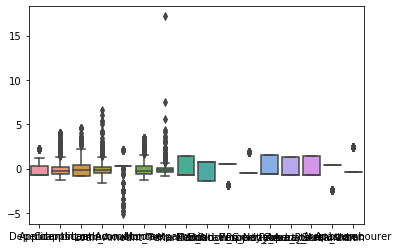

In [427]:
sns.boxplot(data = X_scaled)

In [428]:

# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
 
# réduction d'échelle
data_PCA = pd.DataFrame(scale(X),columns=X.columns)
# composantes principales
C = pca.fit(data_PCA).transform(data_PCA)
C

array([[-6.21320187e-01, -2.22409714e+00,  4.65368225e-01, ...,
         1.11022302e-16, -2.22044605e-16, -8.32667268e-17],
       [ 3.59250328e-01,  2.57321576e-01, -8.41872631e-01, ...,
         4.44089210e-16,  1.66533454e-16, -1.66533454e-16],
       [-9.20691535e-01, -1.67966605e-01, -1.14048788e+00, ...,
         2.22044605e-16, -3.33066907e-16, -1.11022302e-16],
       ...,
       [ 1.80493912e+00, -8.97716625e-02, -4.24566138e-01, ...,
         9.20181906e-17, -2.12296075e-16, -6.93067922e-17],
       [ 1.31726408e+00,  1.99463474e-01, -6.85108334e-01, ...,
         9.20181906e-17, -4.57626215e-17, -1.24817943e-16],
       [-1.36130730e+00, -9.43625913e-01,  3.41705493e+00, ...,
        -5.55111512e-16, -1.66533454e-16, -2.22044605e-16]])

On peut voir ici que les premières variables générées concentrent le plus grand poids de données


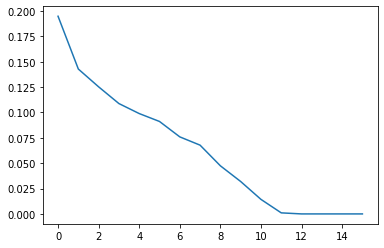

In [429]:
print("On peut voir ici que les premières variables générées concentrent le plus grand poids de données")
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [430]:
print("Taux (addition) de valeurs contenues dans les variables PCA 0 et 1:",
      (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]))

print("Taux (addition) de valeurs contenues dans les variables PCA 0, 1 et 2:",
      (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]))

Taux (addition) de valeurs contenues dans les variables PCA 0 et 1: 0.33757335553096
Taux (addition) de valeurs contenues dans les variables PCA 0, 1 et 2: 0.4628133122657342


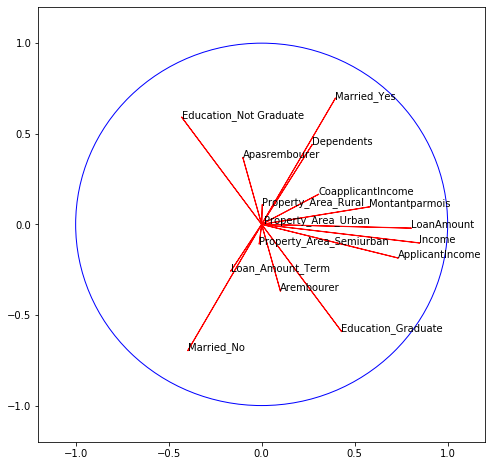

In [431]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_PCA.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

In [432]:
df_pcs=pca.transform(data_PCA)

In [433]:
df_pcs

array([[-6.21320187e-01, -2.22409714e+00,  4.65368225e-01, ...,
         1.11022302e-16, -2.22044605e-16, -8.32667268e-17],
       [ 3.59250328e-01,  2.57321576e-01, -8.41872631e-01, ...,
         4.44089210e-16,  1.66533454e-16, -1.66533454e-16],
       [-9.20691535e-01, -1.67966605e-01, -1.14048788e+00, ...,
         2.22044605e-16, -3.33066907e-16, -1.11022302e-16],
       ...,
       [ 1.80493912e+00, -8.97716625e-02, -4.24566138e-01, ...,
         9.20181906e-17, -2.12296075e-16, -6.93067922e-17],
       [ 1.31726408e+00,  1.99463474e-01, -6.85108334e-01, ...,
         9.20181906e-17, -4.57626215e-17, -1.24817943e-16],
       [-1.36130730e+00, -9.43625913e-01,  3.41705493e+00, ...,
        -5.55111512e-16, -1.66533454e-16, -2.22044605e-16]])

In [434]:
#X = X_scaled
y = df_demise["Loan_Status"]

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [436]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
X_train, y_train = ros.fit_sample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(X_train))

Resampled dataset shape Counter({'Dependents': 1, 'ApplicantIncome': 1, 'CoapplicantIncome': 1, 'LoanAmount': 1, 'Loan_Amount_Term': 1, 'Income': 1, 'Montantparmois': 1, 'Married_No': 1, 'Married_Yes': 1, 'Education_Graduate': 1, 'Education_Not Graduate': 1, 'Property_Area_Rural': 1, 'Property_Area_Semiurban': 1, 'Property_Area_Urban': 1, 'Arembourer': 1, 'Apasrembourer': 1})


In [437]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.30      0.42      0.35        33
           1       0.75      0.63      0.69        90

    accuracy                           0.58       123
   macro avg       0.52      0.53      0.52       123
weighted avg       0.63      0.58      0.60       123



In [438]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dtr=dtree.fit(X_train, y_train)
dtrpred = dtree.predict(X_test)
print(classification_report(y_test,dtrpred))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49        33
           1       0.82      0.79      0.80        90

    accuracy                           0.72       123
   macro avg       0.64      0.65      0.65       123
weighted avg       0.72      0.72      0.72       123



In [439]:
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knncla.fit(X_train, y_train)
KNeighborsClassifierpred = knncla.predict(X_test)

In [440]:
print(classification_report(y_test,KNeighborsClassifierpred))

              precision    recall  f1-score   support

           0       0.28      0.39      0.33        33
           1       0.74      0.63      0.68        90

    accuracy                           0.57       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.62      0.57      0.59       123



In [441]:
random_forest_classifier = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k=4),RandomForestClassifier(random_state=0))
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

In [442]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [443]:
regressionlogistique = LogisticRegression(solver = 'liblinear')
regressionlogistique.fit(X_train, y_train)

regressionlogistique_pred = regressionlogistique.predict(X_test)

In [444]:
print(classification_report(y_test,regressionlogistique_pred))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60        33
           1       0.86      0.82      0.84        90

    accuracy                           0.77       123
   macro avg       0.71      0.73      0.72       123
weighted avg       0.78      0.77      0.78       123



In [445]:
XGboostcla = xgb.XGBClassifier()
train_Xgboost = XGboostcla.fit(X_train, y_train)
predgbcla = train_Xgboost.predict(X_test)
print(classification_report(y_test,predgbcla))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        33
           1       0.84      0.86      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.70      0.70       123
weighted avg       0.77      0.77      0.77       123



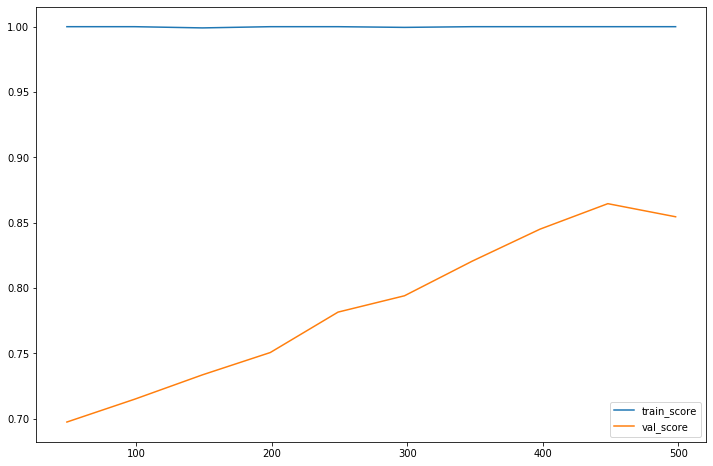

In [446]:
N, train_score,val_score = learning_curve(XGboostcla, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'f1')
plt.figure(figsize=(12,8))

plt.plot(N, train_score.mean(axis=1),label='train_score')
plt.plot(N, val_score.mean(axis=1),label='val_score')
plt.legend()

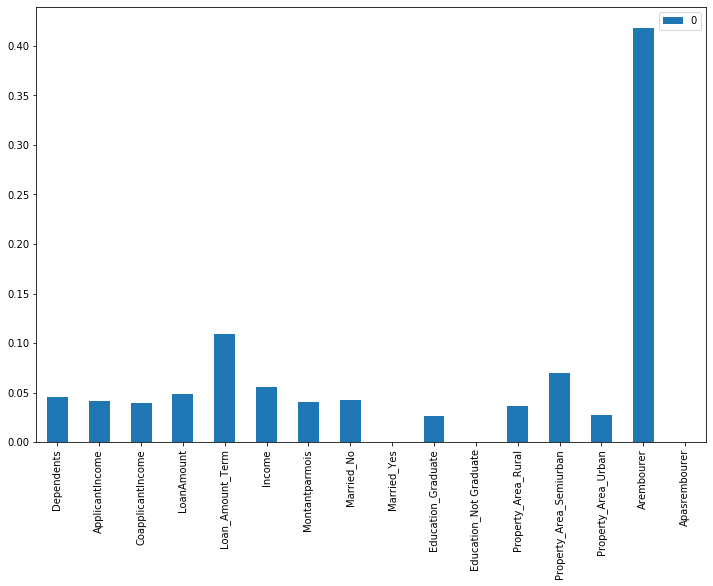

In [447]:
pd.DataFrame(XGboostcla.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

In [448]:
#pd.DataFrame(random_forest_classifier.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

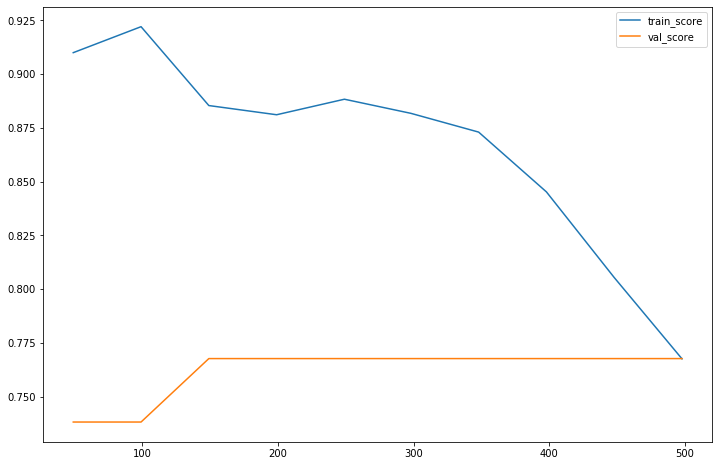

In [449]:
N, train_score,val_score = learning_curve(random_forest_classifier, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'f1')
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1),label='train_score')
plt.plot(N, val_score.mean(axis=1),label='val_score')
plt.legend()

In [450]:
def evaluate(model):
    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    N, train_score,val_score = learning_curve(model, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'f1')
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1),label='train_score')
    plt.plot(N, val_score.mean(axis=1),label='val_score')
    plt.title(f'{name}')
    plt.legend()
    plt.show()

    print("\n____________________________________________________________________________________\n")

In [451]:
Pipe = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=4))

In [452]:
random_forest_classifier = make_pipeline(Pipe, RandomForestClassifier(random_state=0))
adaboost = make_pipeline(Pipe, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(Pipe,StandardScaler(),SVC(random_state=0))
KNN = make_pipeline(Pipe,StandardScaler(),KNeighborsClassifier())
regressionlogistique = make_pipeline(Pipe, LogisticRegression(solver = 'liblinear'))
dtree = make_pipeline(Pipe, tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0))
XGboostcla = make_pipeline(Pipe,xgb.XGBClassifier())

In [453]:
models_pipe = { 'random_forest_classifier' : random_forest_classifier,
               'adaboost' : adaboost,
               'SVM' : SVM,
               'KNN' : KNN,
               'regressionlogistique' : regressionlogistique,
               'dtree' : dtree,
               'XGboostcla' : XGboostcla}

random_forest_classifier
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



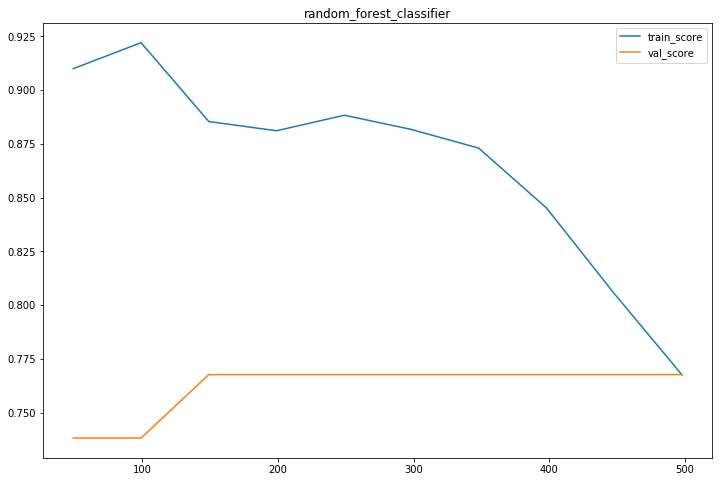


____________________________________________________________________________________

adaboost
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



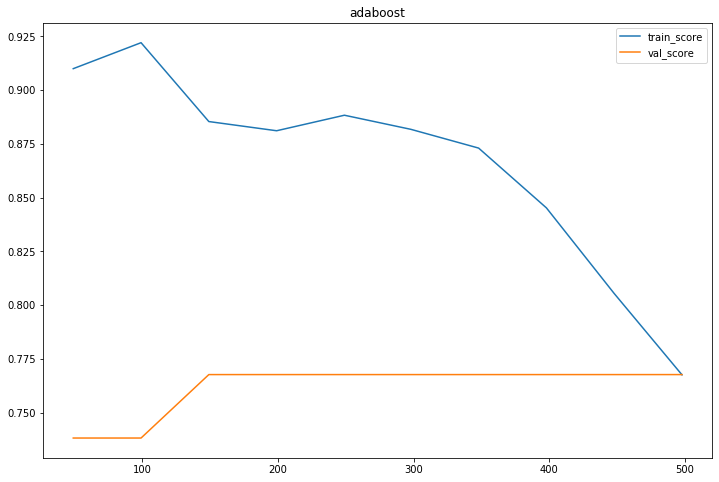


____________________________________________________________________________________

SVM
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



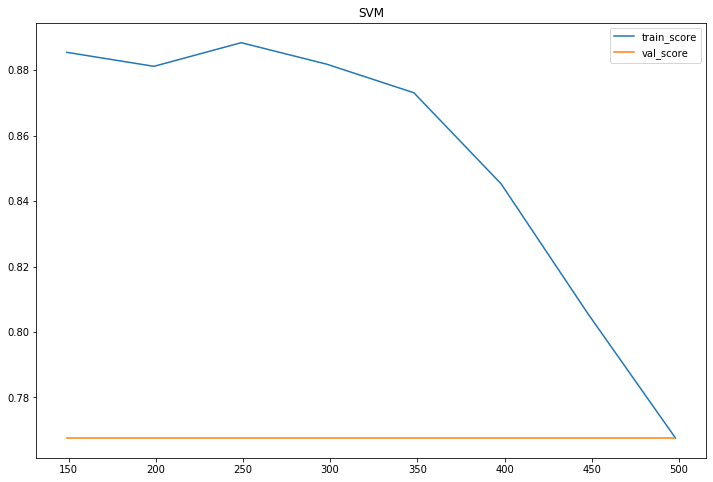


____________________________________________________________________________________

KNN
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



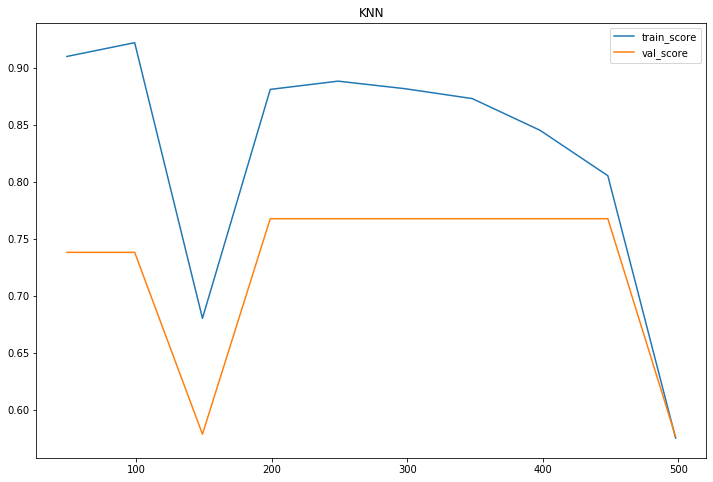


____________________________________________________________________________________

regressionlogistique
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



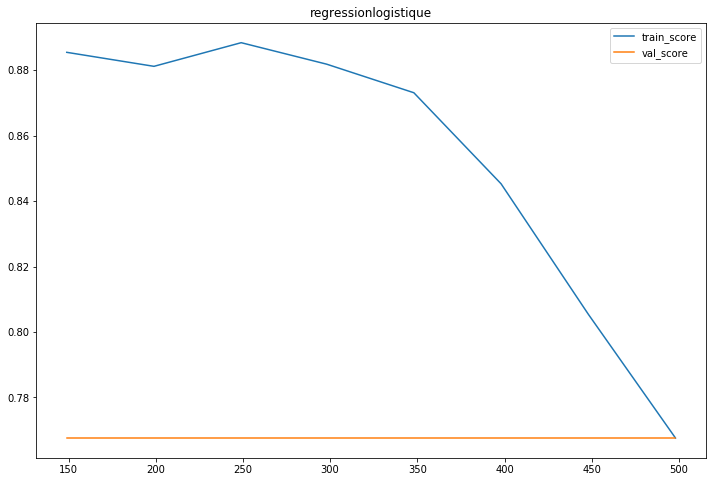


____________________________________________________________________________________

dtree
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



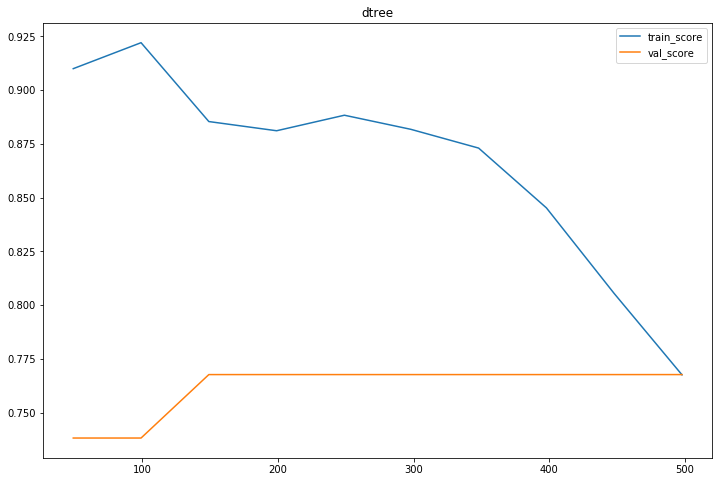


____________________________________________________________________________________

XGboostcla
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



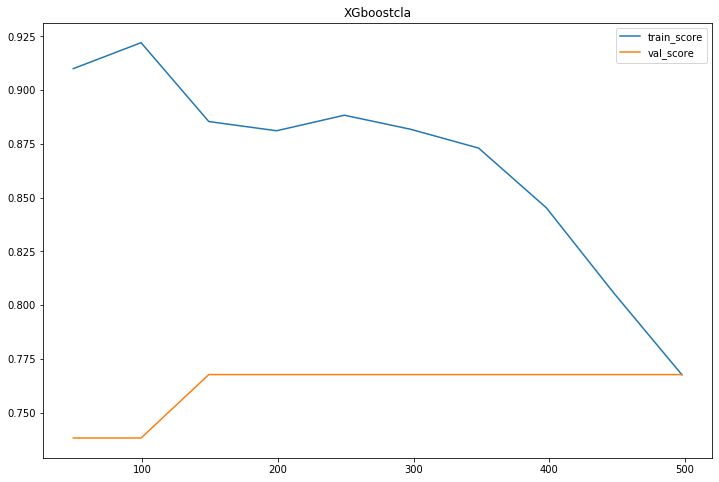


____________________________________________________________________________________



In [454]:
for name,model in models_pipe.items() : 
    print(name)
    evaluate(model)


In [455]:
SVM.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=4))])),
  ('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=4))]),
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=4))],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=4),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynomialfeatures__order': 'C',
 'pipeline__se

In [456]:
params = {'svc__gamma':[1e-3, 1e-4],
          'svc__C':[1.0,10.0,100.0,1000.0],
          'pipeline__polynomialfeatures__degree':[2,3,4],
          'pipeline__selectkbest__k':range(2,17)}

In [457]:
 #        'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],

In [458]:
#grid = GridSearchCV(SVM, params,scoring='accuracy',cv=4)
grid = RandomizedSearchCV(SVM, params,scoring='f1',cv=4,n_iter=20)
grid.fit(X_train,y_train)
print(grid.best_params_)

svm_pred = grid.predict(X_test)

print(classification_report(y_test,svm_pred))

{'svc__gamma': 0.001, 'svc__C': 100.0, 'pipeline__selectkbest__k': 2, 'pipeline__polynomialfeatures__degree': 4}
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [459]:
precision,recall,threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

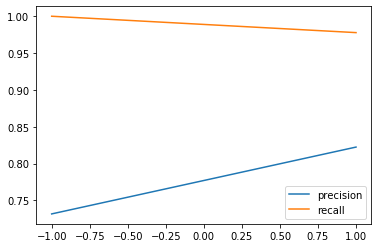

In [460]:
plt.plot(threshold,precision[:-1], label="precision")
plt.plot(threshold,recall[:-1], label="recall")
plt.legend()

In [461]:
def final(model,X,treshold=0):
    return model.decision_function(X) > treshold

In [462]:
f_pred = final(grid.best_estimator_,X_test,treshold=1)

In [463]:
f1_score(y_test,f_pred)

0.0

In [464]:
recall_score(y_test,f_pred)

0.0

In [465]:
print(classification_report(y_test,f_pred))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42        33
           1       0.00      0.00      0.00        90

    accuracy                           0.27       123
   macro avg       0.13      0.50      0.21       123
weighted avg       0.07      0.27      0.11       123

